### Zadanie 1

Bazując na przykładzie z wykładu stwórz model regresji wielomianowej dla dwóch stworzonych tutaj modeli regresji liniowej. Porównaj wyniki.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
otodf = pd.read_csv(f'data/Otodom_Flat_Listings.csv')

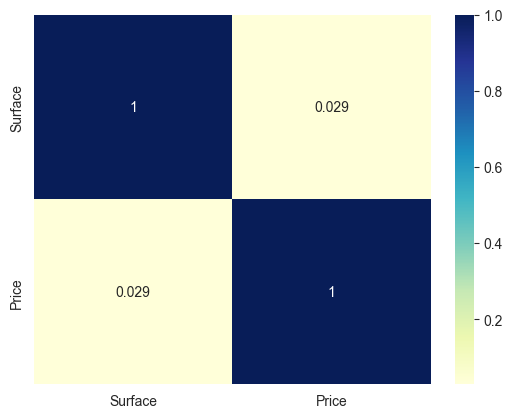

In [45]:
otodf_1 = otodf[['Surface', 'Price']].dropna()

sns.heatmap(otodf_1.corr(), annot=True, cmap='YlGnBu')
plt.show()

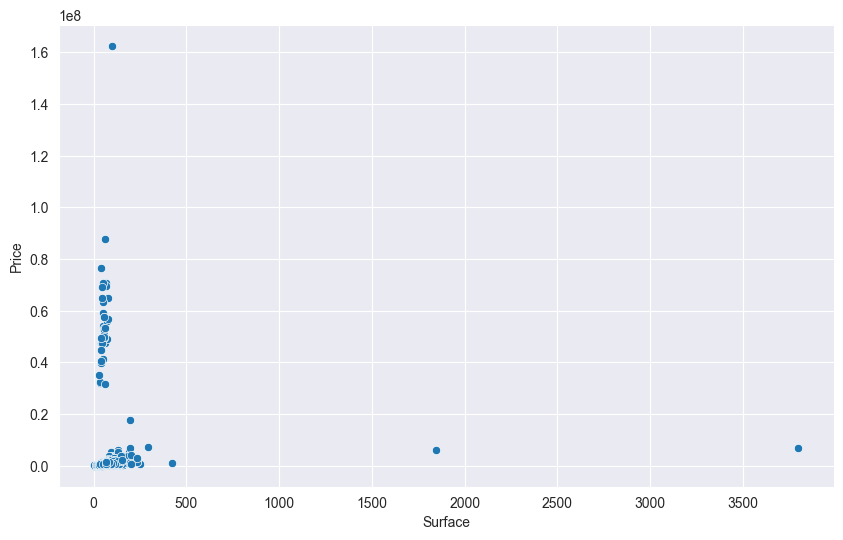

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Surface', y='Price', data=otodf_1)
plt.xlabel('Surface')
plt.ylabel('Price')
plt.show()

In [47]:
X = otodf_1[['Surface']]
y = otodf_1['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_predictions = lin_reg.predict(X_test)

print("Linear Regression:")
print("Intercept:", lin_reg.intercept_)
print("Coefficient:", lin_reg.coef_[0])
print("R-squared:", r2_score(y_test, lin_reg_predictions))
print("MAE:", mean_absolute_error(y_test, lin_reg_predictions))
print("MSE:", mean_squared_error(y_test, lin_reg_predictions))

Linear Regression:
Intercept: 1393959.888424575
Coefficient: 2375.361886927432
R-squared: 0.0004911898590828079
MAE: 1875141.1343519343
MSE: 81450569367726.75


In [48]:
# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
poly_reg_predictions = poly_reg.predict(X_test_poly)

print("\nPolynomial Regression (Degree 2):")
print("Intercept:", poly_reg.intercept_)
print("Coefficients:", poly_reg.coef_)
print("R-squared:", r2_score(y_test, poly_reg_predictions))
print("MAE:", mean_absolute_error(y_test, poly_reg_predictions))
print("MSE:", mean_squared_error(y_test, poly_reg_predictions))


Polynomial Regression (Degree 2):
Intercept: 1023889.9697998333
Coefficients: [ 0.00000000e+00  8.75348037e+03 -1.96841519e+00]
R-squared: 0.0017575735602989306
MAE: 1865897.0256582673
MSE: 81347371004235.06


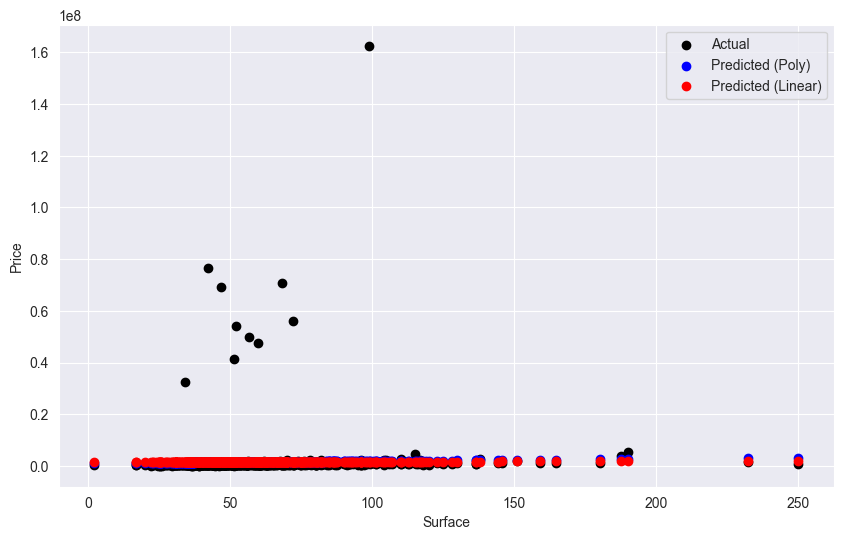

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, poly_reg_predictions, color='blue', label='Predicted (Poly)')
plt.scatter(X_test, lin_reg_predictions, color='red', label='Predicted (Linear)')
plt.xlabel('Surface')
plt.ylabel('Price')
plt.legend()
plt.show()

### Zadanie 2

Dodaj do zbioru danych cechę `Number of rooms` i sprawdź jak to wpływa na jakość modelu.


In [12]:
df = otodf

In [23]:
def clean_rooms(val):
    val = str(val).strip()
    if val.lower() == 'więcej niż 10':
        return 11
    if val:
        return int(val)
    return None  # dla wartości nieokreślonych

# Przekształcenie kolumny
df['Number_of_Rooms_Clean'] = df['Number_of_Rooms'].apply(clean_rooms)

# Usunięcie wierszy z brakującą liczbą pokoi
df_clean = df.dropna(subset=['Number_of_Rooms_Clean'])

# Rzutowanie na int
df_clean['Number_of_Rooms_Clean'] = df_clean['Number_of_Rooms_Clean'].astype(int)

    Surface      Price  Number_of_Rooms_Clean
0     47.00   415000.0                      2
1    105.00  2499000.0                      4
2     60.00   649000.0                      3
3     78.30  2108000.0                      3
4     49.20   450180.0                      2
..      ...        ...                    ...
95    63.46   600000.0                      3
96    66.67        NaN                      4
97    50.00   620000.0                      2
98    64.00  1550000.0                      3
99    42.50   700000.0                      3

[100 rows x 3 columns]


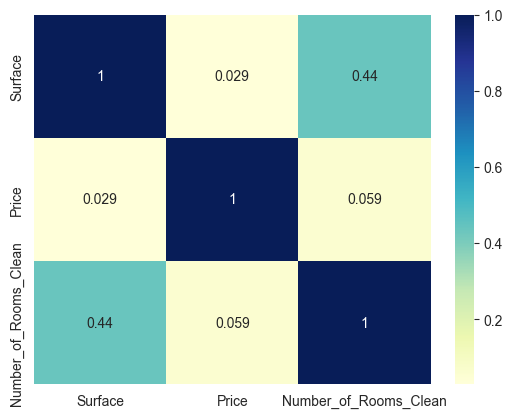

In [29]:
otodf_2 = df_clean[['Surface', 'Price', 'Number_of_Rooms_Clean']].dropna()

sns.heatmap(otodf_2.corr(), annot=True, cmap='YlGnBu')
plt.show()

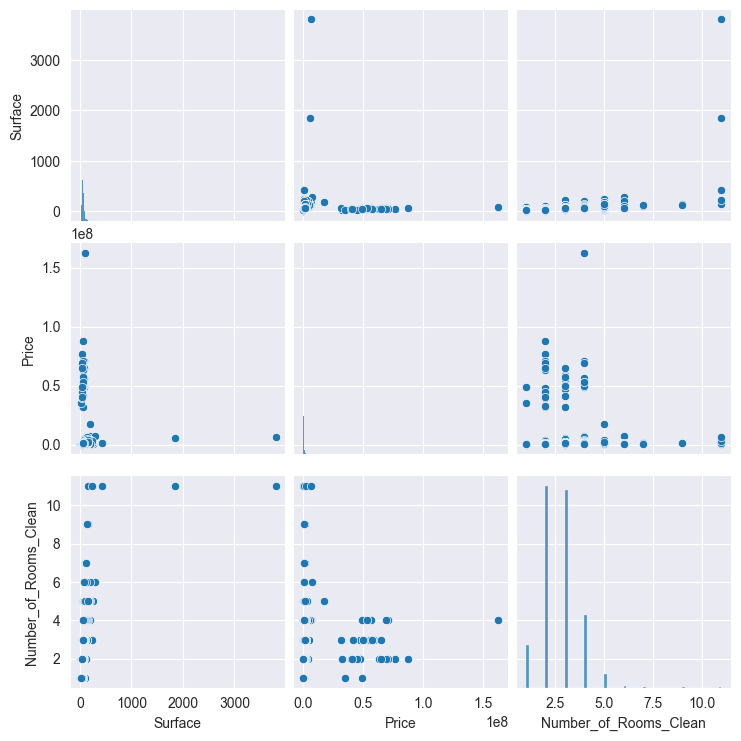

In [30]:
sns.pairplot(otodf_2)
plt.show()

In [31]:
X = otodf_2[['Surface', 'Number_of_Rooms_Clean']]
y = otodf_2['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_predictions = lin_reg.predict(X_test)

# Evaluate linear regression model
print("Linear Regression with Surface and Number of Rooms:")
print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)
print("R-squared:", r2_score(y_test, lin_reg_predictions))
print("MAE:", mean_absolute_error(y_test, lin_reg_predictions))
print("MSE:", mean_squared_error(y_test, lin_reg_predictions))

Linear Regression with Surface and Number of Rooms:
Intercept: 478774.9876930893
Coefficients: [   567.29289961 383062.77458739]
R-squared: 0.0037250525554469727
MAE: 1864467.683977827
MSE: 81187039966881.58


In [32]:
# Polynomial Regression (Degree 2)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
poly_reg_predictions = poly_reg.predict(X_test_poly)

print("\nPolynomial Regression (Degree 2) with Surface and Number of Rooms:")
print("Intercept:", poly_reg.intercept_)
print("Coefficients:", poly_reg.coef_)
print("R-squared:", r2_score(y_test, poly_reg_predictions))
print("MAE:", mean_absolute_error(y_test, poly_reg_predictions))
print("MSE:", mean_squared_error(y_test, poly_reg_predictions))


Polynomial Regression (Degree 2) with Surface and Number of Rooms:
Intercept: 34139.0487529994
Coefficients: [ 0.00000000e+00 -2.06961765e+01  6.96849408e+05 -3.15229622e-01
  2.36870612e+02 -4.90596962e+04]
R-squared: 0.004211746958662332
MAE: 1869426.3333565695
MSE: 81147378949542.08


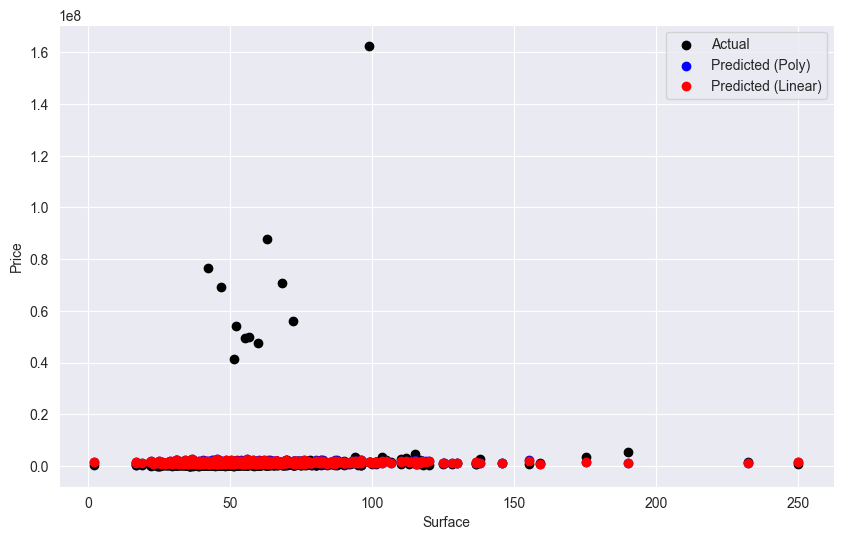

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Surface'], y_test, color='black', label='Actual')
plt.scatter(X_test['Surface'], poly_reg_predictions, color='blue', label='Predicted (Poly)')
plt.scatter(X_test['Surface'], lin_reg_predictions, color='red', label='Predicted (Linear)')
plt.xlabel('Surface')
plt.ylabel('Price')
plt.legend()
plt.show()

### Zadanie 3

Zakoduj cechę `Voivoideship` (one-hot, dummy ?) i wykorzystaj w zbiorze danych i ponownie sprawdź jaki to ma wpływ na model.


In [37]:
df_clean = df.dropna(subset=['Surface', 'Price', 'Number_of_Rooms_Clean', 'Voivodeship']).copy()
df_clean['Number_of_Rooms_Clean'] = df_clean['Number_of_Rooms_Clean'].astype(int)
df_encoded = pd.get_dummies(df_clean, columns=['Voivodeship'], drop_first=True)

features = ['Surface', 'Number_of_Rooms_Clean'] + [col for col in df_encoded.columns if col.startswith('Voivodeship_')]
X = df_encoded[features]
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

In [38]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name}")
    print("R²:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))

In [39]:
evaluate_model("Regresja liniowa z Voivodeship", y_test, y_pred_lin)
evaluate_model("Regresja wielomianowa z Voivodeship", y_test, y_pred_poly)


Regresja liniowa z Voivodeship
R²: -5.774701619132294e-05
MAE: 1991411.468385511
MSE: 94627752420374.02

Regresja wielomianowa z Voivodeship
R²: 0.0026868678861134976
MAE: 2025176.190825957
MSE: 94368050677910.17


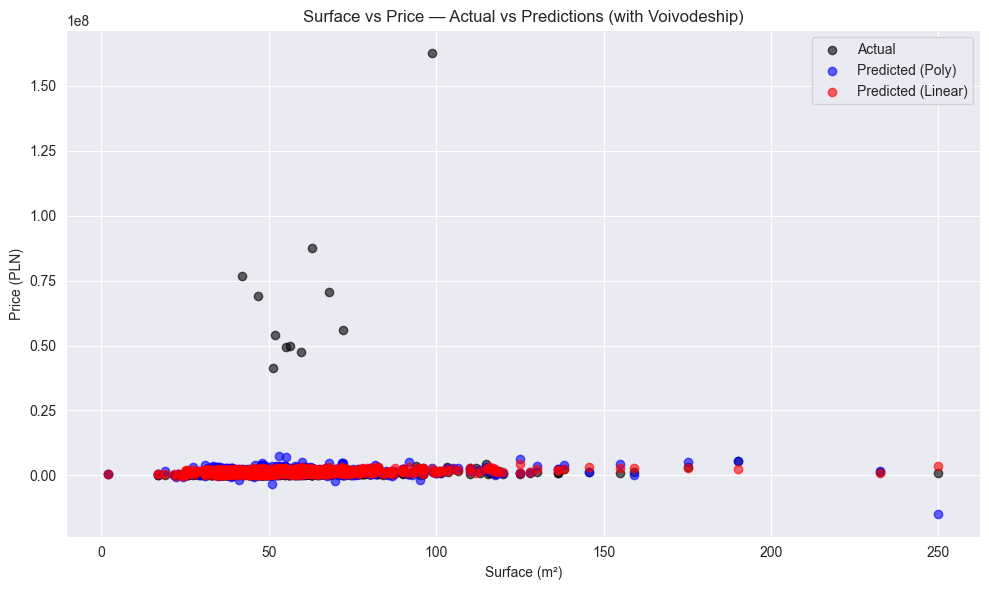

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Surface'], y_test, color='black', alpha=0.6, label='Actual')
plt.scatter(X_test['Surface'], y_pred_poly, color='blue', alpha=0.6, label='Predicted (Poly)')
plt.scatter(X_test['Surface'], y_pred_lin, color='red', alpha=0.6, label='Predicted (Linear)')
plt.xlabel('Surface (m²)')
plt.ylabel('Price (PLN)')
plt.title('Surface vs Price — Actual vs Predictions (with Voivodeship)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Zadanie 4

Dodaj kolejne cechy modelu zastanawiając się nad poprawnym ich zakodowaniem, tak aby poprawić jego jakość.

\* zadanie opcjonalne (może być brane pod uwagę w przypadku wątpliwości co do finalnej oceny).